**Objective: The objective of this project is to analyze customer shopping trends and look for correalations between different features.**

# **Import the data**

In [3]:
import pandas as pd

data = pd.read_csv('D:/Dataset/customer_shopping_dataset/shopping_trends_updated.csv')

# **Data Exploration**

In [4]:
data.shape

(3900, 18)

In [5]:
data.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


**Check for missing data**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

<Axes: >

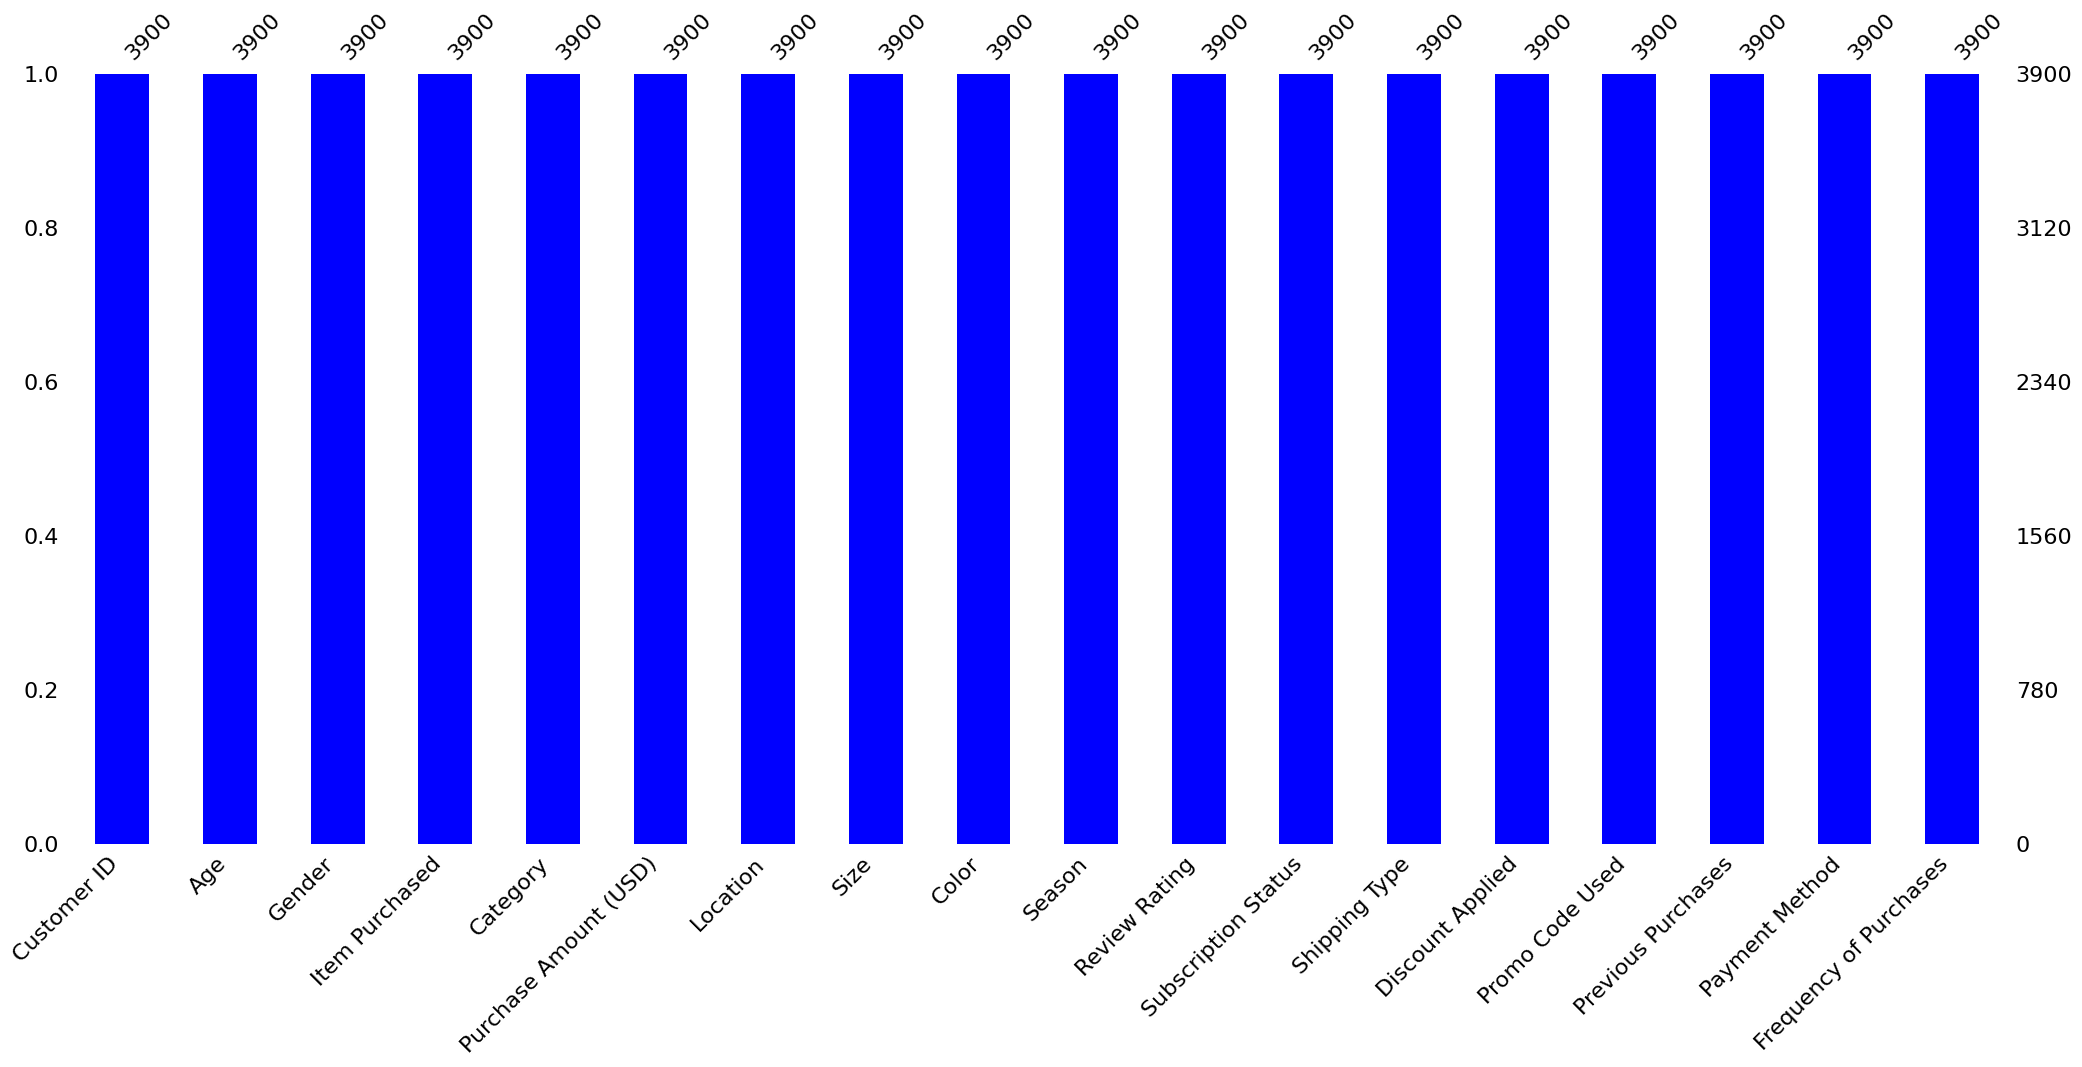

In [7]:
import missingno as msno
msno.bar(data, color = 'b')

> No missing data.

In [8]:
data.drop('Customer ID', axis=1, inplace=True)


# **Data Visualization**

In [9]:
import plotly.express as px

grouped_data = data.groupby(['Season', 'Gender']).size().unstack(fill_value=0).reset_index()

fig = px.bar(grouped_data, x='Season', y=['Male', 'Female'], 
             title='Purchases per Season by Gender',
             color_discrete_map={'Male': 'blue', 'Female': 'purple'},
             barmode='stack')

fig.update_layout(bargap=0.5)  
fig.update_yaxes(title_text='Count of Purchases')
fig.update_layout(legend_title_text='Sex')

fig.show()


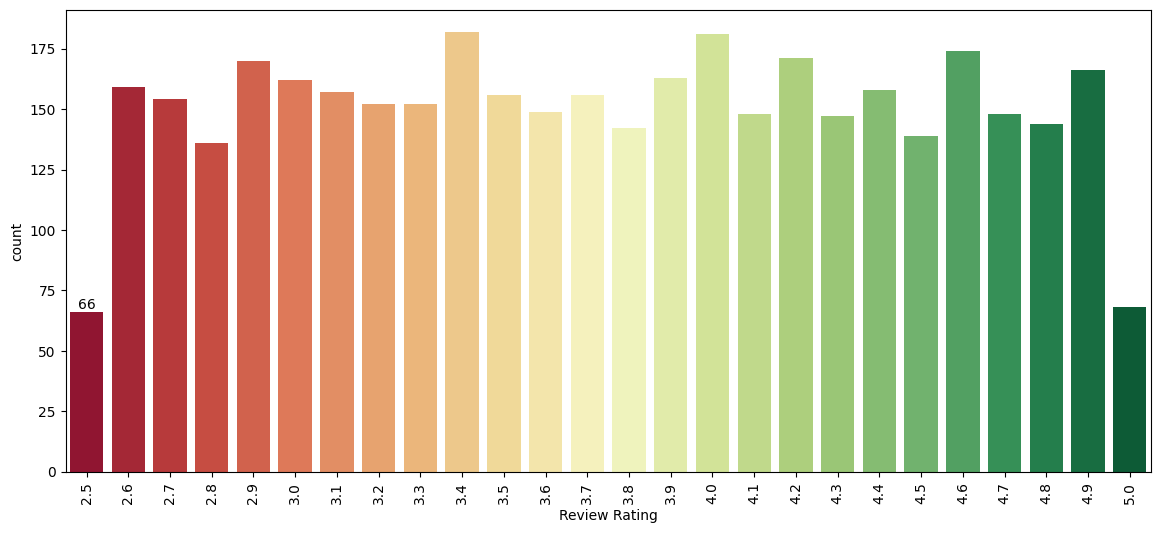

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
ax = sns.countplot(x='Review Rating', hue='Review Rating', data=data, palette='RdYlGn', legend=False)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

In [11]:
import plotly.express as px

category_counts = data["Category"].value_counts().reset_index()
color_counts = data["Color"].value_counts().reset_index()

fig1 = px.pie(category_counts, values='count', names='Category', title='Distribution of Categories', hole=0.5)
fig2 = px.pie(color_counts, values='count', names='Color', title='Distribution of Colors', hole=0.5)

fig1.show()
fig2.show()

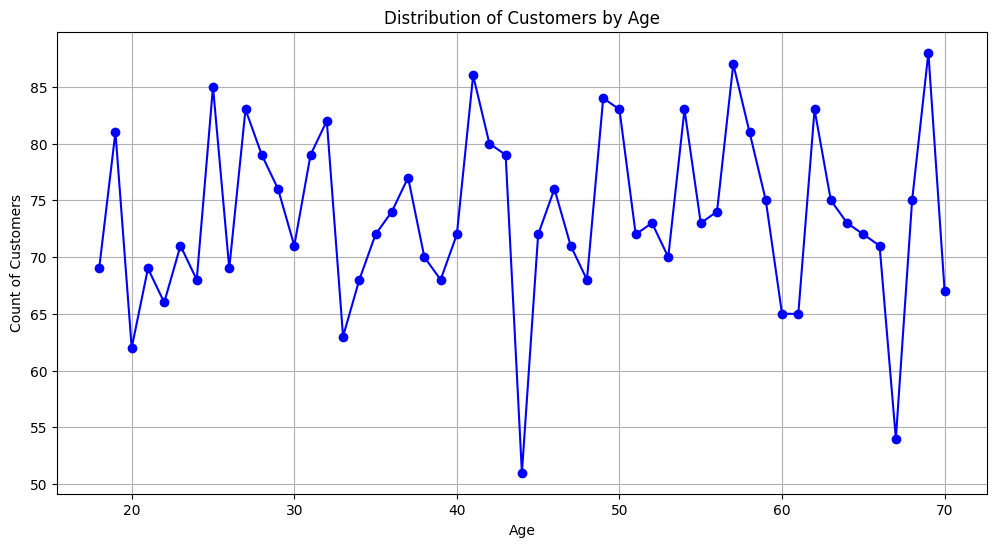

In [12]:
import matplotlib.pyplot as plt

# Compute the counts for each unique age value
age_counts = data['Age'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(age_counts.index, age_counts.values, color='blue', marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Count of Customers')
plt.title('Distribution of Customers by Age')
plt.grid(True)  # Add grid lines for better visualization
plt.show()


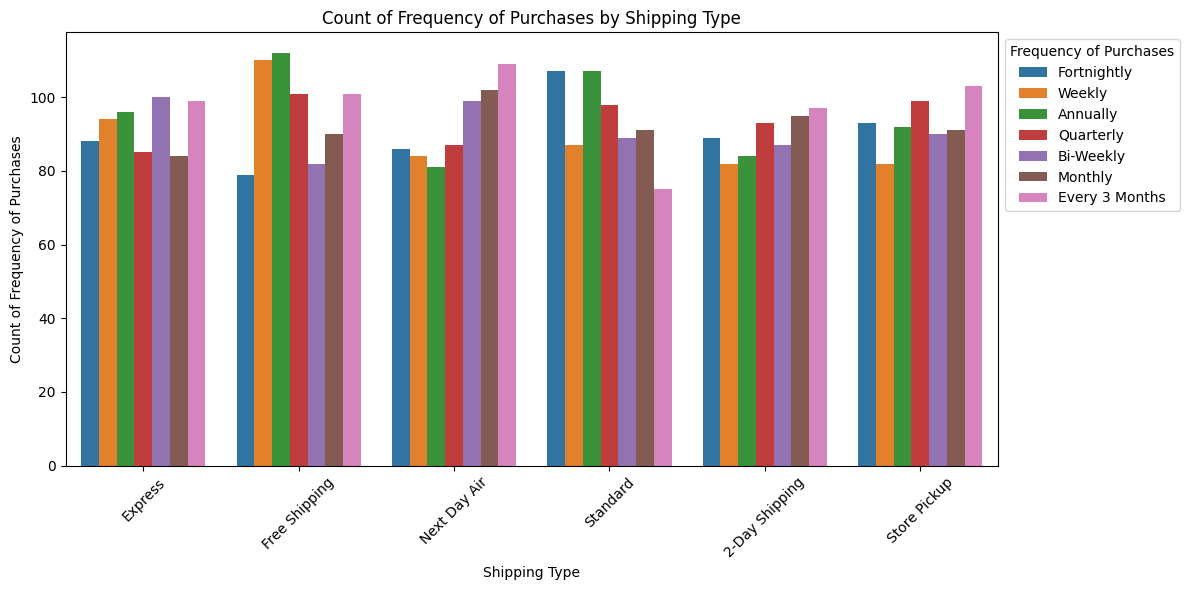

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='Shipping Type', hue='Frequency of Purchases', data=data)

plt.title('Count of Frequency of Purchases by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Count of Frequency of Purchases')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Frequency of Purchases', fontsize=10)
plt.tight_layout()
plt.show()


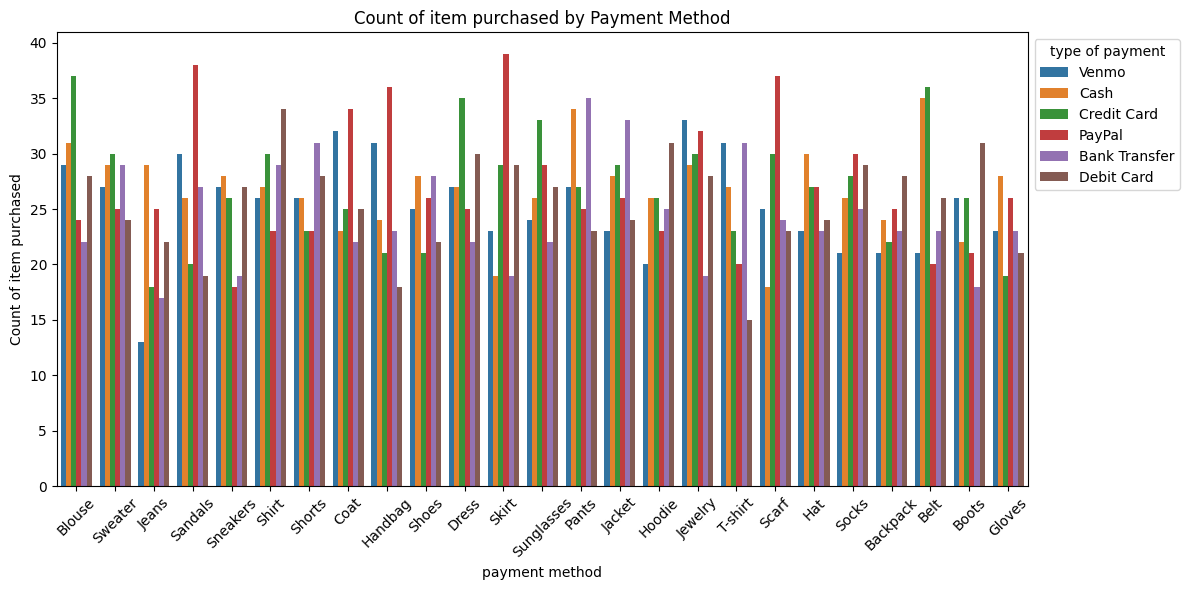

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='Item Purchased', hue='Payment Method', data=data)

plt.title('Count of item purchased by Payment Method')
plt.xlabel('payment method')
plt.ylabel('Count of item purchased')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='type of payment', fontsize=10)
plt.tight_layout()
plt.show()


# **Feature Encoding**

In [15]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for c in data.columns:
    if(data[c].dtype=='object'):
        data[c]=label.fit_transform(data[c])
    else:
        data[c]=data[c]
        
data.head(3) 

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,1,2,1,53,16,0,7,3,3.1,1,1,1,1,14,5,3
1,19,1,23,1,64,18,0,12,3,3.1,1,1,1,1,2,1,3
2,50,1,11,1,73,20,2,12,1,3.1,1,2,1,1,23,2,6


In [16]:
# check if the feature encoding worked
print(f'Unique values in gender: {data["Gender"].unique()}')
print(f'Unique values in season: {data["Season"].unique()}')
# ...

Unique values in gender: [1 0]
Unique values in season: [3 1 2 0]


**Check for correlations**

In [17]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix["Review Rating"].sort_values(ascending=False)

Review Rating             1.000000
Purchase Amount (USD)     0.030776
Size                      0.027603
Color                     0.027356
Payment Method            0.014404
Gender                    0.008164
Frequency of Purchases    0.005643
Previous Purchases        0.004229
Season                    0.000160
Category                 -0.000299
Location                 -0.004222
Item Purchased           -0.004621
Subscription Status      -0.006368
Shipping Type            -0.009787
Discount Applied         -0.012486
Promo Code Used          -0.012486
Age                      -0.021949
Name: Review Rating, dtype: float64

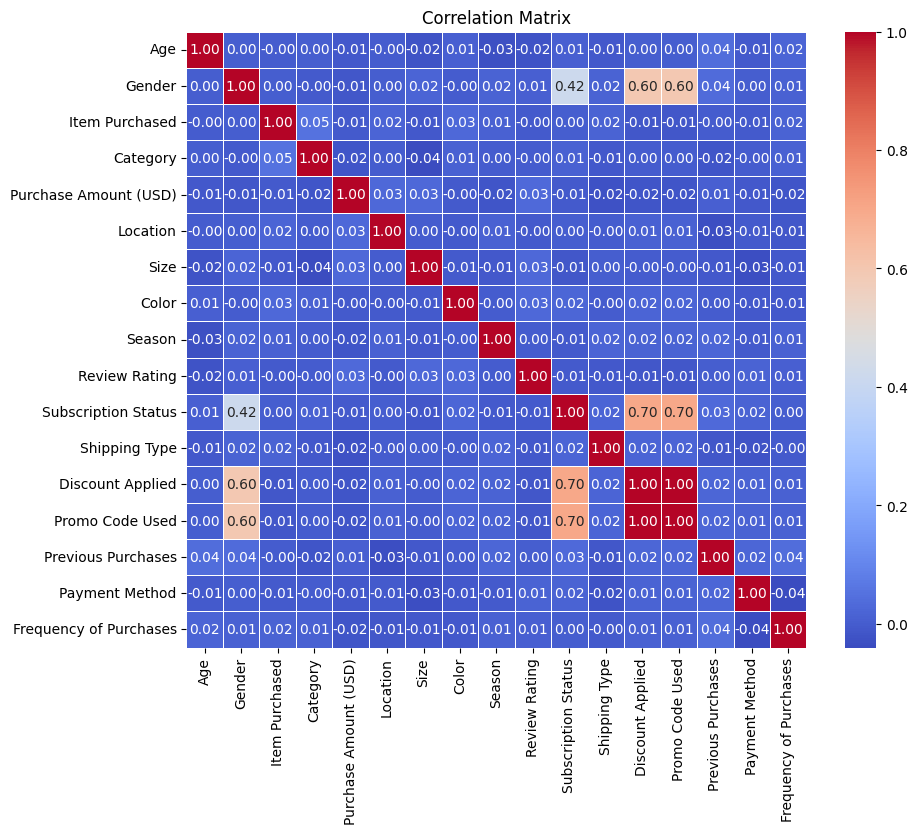

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
